### Import Statements

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
from scipy import stats

In [2]:
pre_clean_winemag = pd.read_csv('Data/winemag-data-130k-v2.csv')

In [3]:
pre_clean_winemag_nodup = pre_clean_winemag.duplicated(subset='title', keep='first')

In [4]:
pre_clean_winemag[pre_clean_winemag_nodup].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11131 entries, 959 to 129913
Data columns (total 14 columns):
Unnamed: 0               11131 non-null int64
country                  11127 non-null object
description              11131 non-null object
designation              7955 non-null object
points                   11131 non-null int64
price                    10394 non-null float64
province                 11127 non-null object
region_1                 9378 non-null object
region_2                 3943 non-null object
taster_name              9620 non-null object
taster_twitter_handle    9171 non-null object
title                    11131 non-null object
variety                  11131 non-null object
winery                   11131 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 1.3+ MB


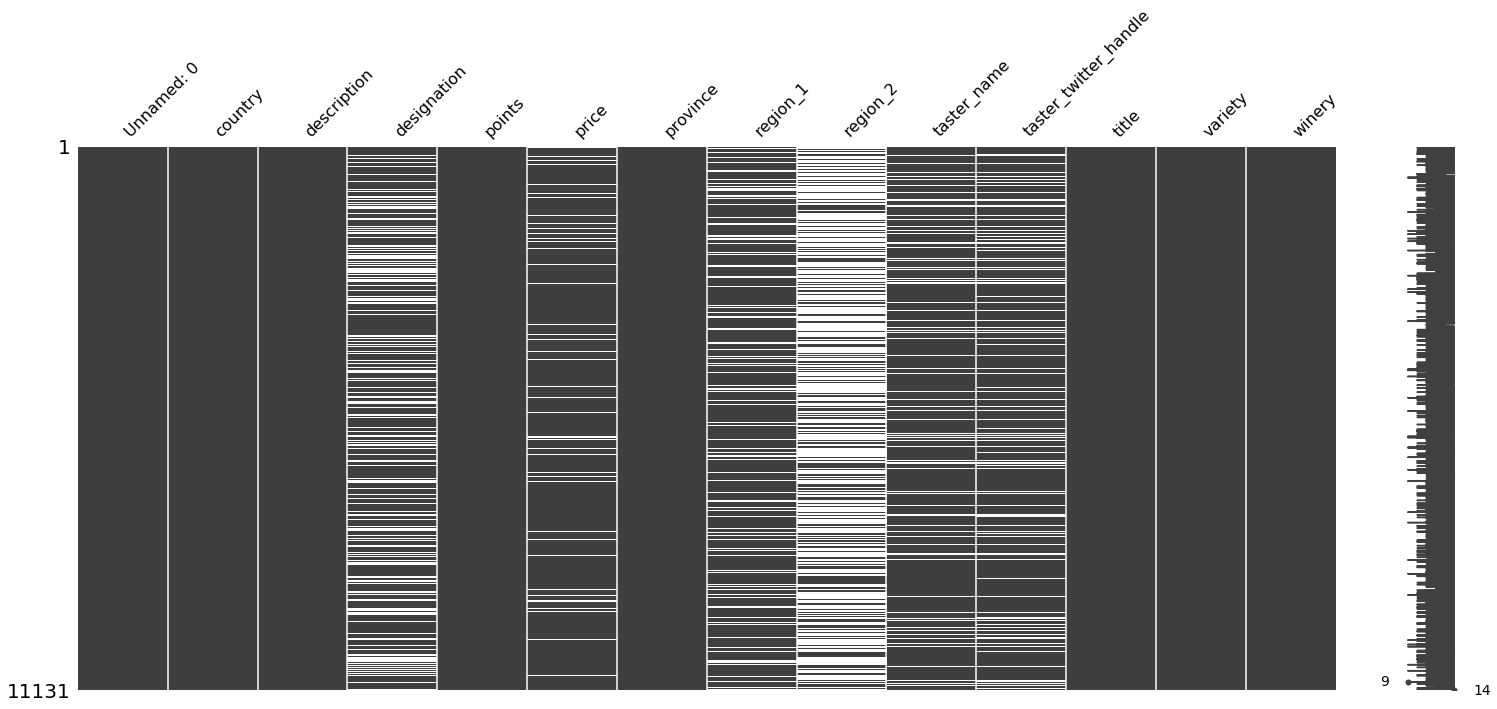

In [5]:
missingno.matrix(pre_clean_winemag[pre_clean_winemag_nodup])

In [6]:
pre_clean_winemag_nodup = pre_clean_winemag[pre_clean_winemag_nodup].drop(['Unnamed: 0', 'designation', 'region_1', 'region_2'], axis=1)

In [7]:
pre_clean_winemag_nodup = pre_clean_winemag_nodup.dropna()

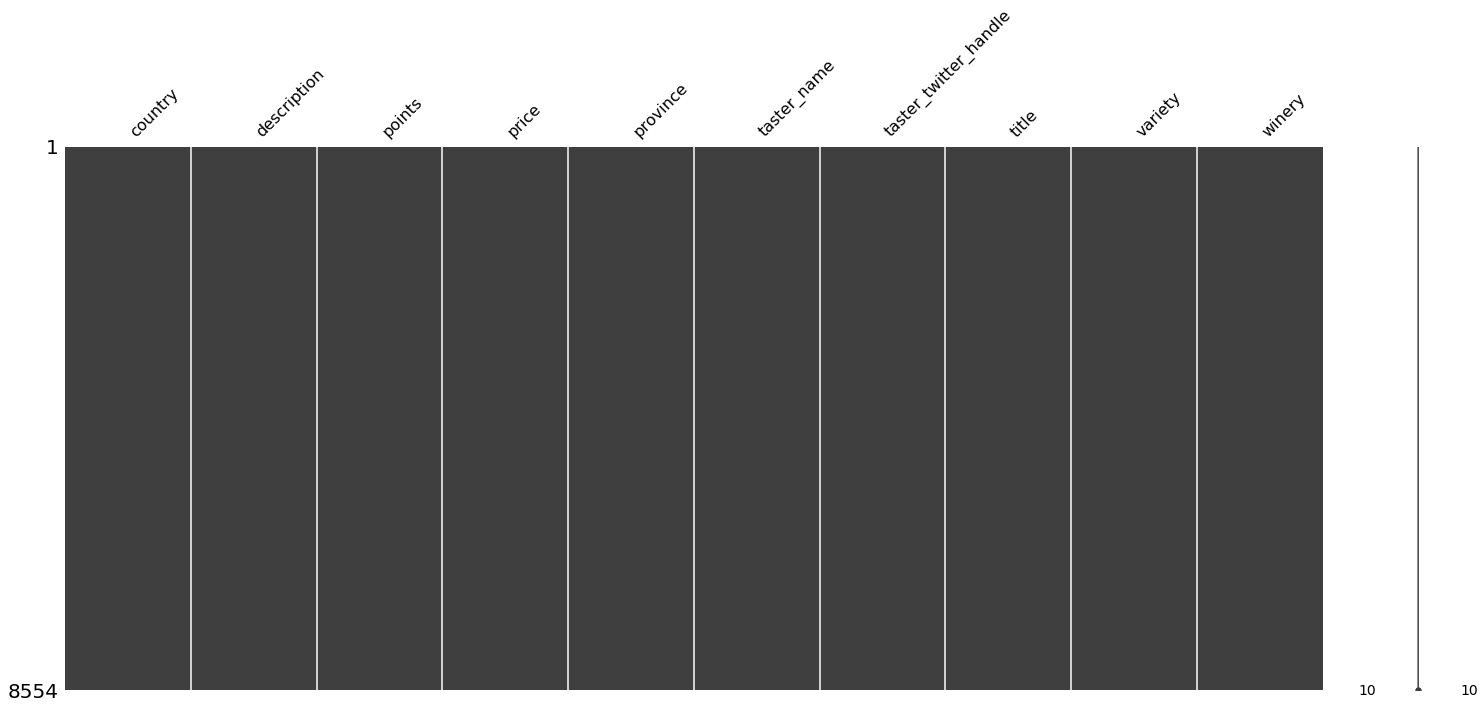

In [8]:
missingno.matrix(pre_clean_winemag_nodup)

In [9]:
clean_winemag = pre_clean_winemag_nodup[pre_clean_winemag_nodup['price'] >= 100 ].index
pre_clean_winemag_nodup.drop(clean_winemag, inplace=True)

In [10]:
pre_clean_winemag_nodup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8380 entries, 959 to 129913
Data columns (total 10 columns):
country                  8380 non-null object
description              8380 non-null object
points                   8380 non-null int64
price                    8380 non-null float64
province                 8380 non-null object
taster_name              8380 non-null object
taster_twitter_handle    8380 non-null object
title                    8380 non-null object
variety                  8380 non-null object
winery                   8380 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 720.2+ KB


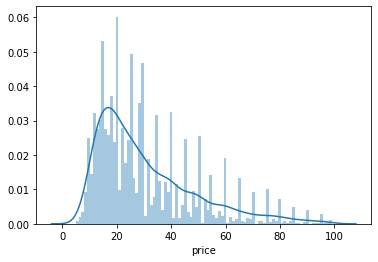

In [11]:
sns.distplot(pre_clean_winemag_nodup['price'], bins=90)

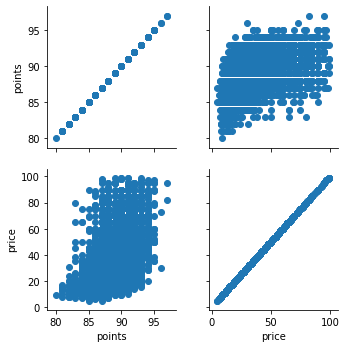

In [12]:
g = sns.PairGrid(pre_clean_winemag_nodup)
g.map(plt.scatter);

In [13]:
winemag_data = pre_clean_winemag_nodup

In [14]:
winemag_data.groupby("country")['price'].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Argentina,251.0,21.741036,12.458919,8.0,13.00,18.0,25.00,75.0
Australia,128.0,30.875000,21.598338,8.0,16.00,20.0,37.50,95.0
Austria,272.0,25.132353,12.504942,11.0,17.00,22.0,29.25,80.0
Brazil,3.0,13.000000,1.732051,12.0,12.00,12.0,13.50,15.0
Bulgaria,8.0,12.125000,2.642374,9.0,10.75,11.0,14.00,17.0
Canada,29.0,35.413793,19.223344,15.0,23.00,32.0,38.00,95.0
Chile,290.0,18.706897,11.590786,5.0,12.00,15.0,20.00,85.0
Croatia,1.0,27.000000,NaN,27.0,27.00,27.0,27.00,27.0
Cyprus,1.0,14.000000,NaN,14.0,14.00,14.0,14.00,14.0


In [15]:
winemag_data.head()

,country,description,points,price,province,taster_name,taster_twitter_handle,title,variety,winery
959,France,Partially from Grand Cru vineyards in the Mont...,87,40.0,Champagne,Roger Voss,@vossroger,Jacquart NV Brut Mosaïque (Champagne),Champagne Blend,Jacquart
2360,France,"A smooth and rounded wine, its ripe plum and b...",88,35.0,Burgundy,Roger Voss,@vossroger,Domaines Devillard 2011 Château de Chamirey (...,Pinot Noir,Domaines Devillard
2408,US,"This is weighty, creamy and medium to full in ...",85,14.0,California,Virginie Boone,@vboone,Souverain 2010 Chardonnay (North Coast),Chardonnay,Souverain
2410,Chile,Lightly herbal strawberry and raspberry aromas...,85,13.0,Maipo Valley,Michael Schachner,@wineschach,Tres Palacios 2011 Reserve Pinot Noir (Maipo V...,Pinot Noir,Tres Palacios
2413,France,"Fruity and lightly herbaceous, this has fine t...",85,15.0,Bordeaux,Roger Voss,@vossroger,Château de Sours 2011 La Fleur d'Amélie (Bord...,Bordeaux-style White Blend,Château de Sours


In [16]:
us_wine = winemag_data.loc[winemag_data['country'] == 'US']

In [17]:
french_wine = winemag_data.loc[winemag_data['country'] == 'France']

In [18]:
# ex_us_fr = winemag_data.loc[(winemag_data['country'] != 'US') & (winemag_data['country'] != 'France')]

# df.loc[(df["B"] > 50) & (df["C"] == 900), "A"]

In [19]:
# ex_us_fr.country.value_counts()

In [20]:
us_mean = us_wine.points.mean()

In [21]:
us_std = us_wine.points.std()

In [22]:
french_mean = french_wine.points.mean()

In [23]:
french_std = french_wine.points.std()

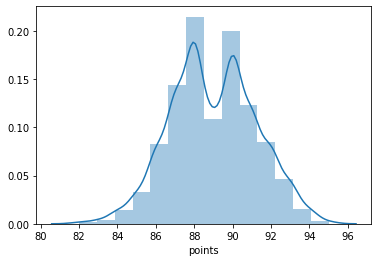

In [50]:
sns.distplot(us_wine['points'], bins=14)

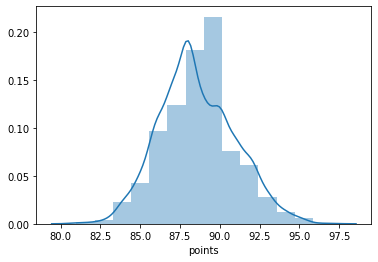

In [51]:
sns.distplot(french_wine['points'], bins=14)

In [26]:
pop_mean = winemag_data.points.mean()

In [27]:
pop_std = winemag_data.points.std()

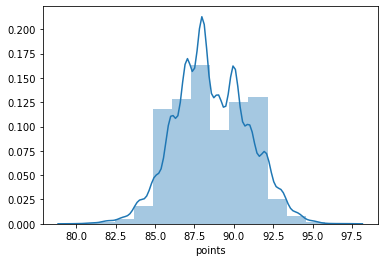

In [52]:
sns.distplot(winemag_data['points'], bins=14)

In [29]:
pop_mean = pop_mean
sample_data = us_wine['points']

In [30]:
# ttest_1samp(sample_data, pop_mean)
stats.ttest_ind(us_wine['points'], french_wine['points'], equal_var = False)

Ttest_indResult(statistic=6.415445259375518, pvalue=1.5736448227515e-10)

In [31]:
stats.shapiro(us_wine['points'])

(0.9775567054748535, 1.3038238515427114e-21)

In [32]:
stats.shapiro(french_wine['points'])

(0.9787120819091797, 2.9802211033498236e-16)

In [34]:
def welch_dof(x,y):
        dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
        print(f"Welch-Satterthwaite Degrees of Freedom = {dof:.4f}")
        
welch_dof(us_wine['points'], french_wine['points'])

Welch-Satterthwaite Degrees of Freedom = 3866.9575


In [35]:
def welch_ttest(x, y): 
    ## Welch-Satterthwaite Degrees of Freedom ##
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
   
    t, p = stats.ttest_ind(x, y, equal_var = False)
    
    print("\n",
          f"Welch's t-test= {t:.4f}", "\n",
          f"p-value = {p:.4f}", "\n",
          f"Welch-Satterthwaite Degrees of Freedom = {dof:.4f}")

welch_ttest(us_wine['points'], french_wine['points'])



 Welch's t-test= 6.4154 
 p-value = 0.0000 
 Welch-Satterthwaite Degrees of Freedom = 3866.9575


In [108]:
p = 1 - stats.t.cdf(, us_wine['points'])

NameError: name 't' is not defined

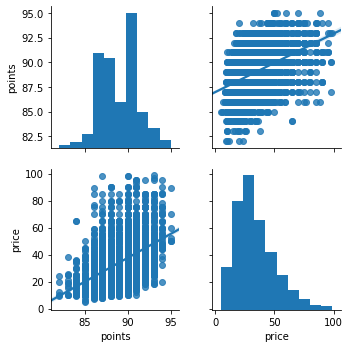

In [42]:
sns.pairplot(us_wine, kind='reg')

In [43]:
us_wine.head()

,country,description,points,price,province,taster_name,taster_twitter_handle,title,variety,winery
2408,US,"This is weighty, creamy and medium to full in ...",85,14.0,California,Virginie Boone,@vboone,Souverain 2010 Chardonnay (North Coast),Chardonnay,Souverain
3432,US,"The aromas are light, with notes of freshly cu...",88,27.0,Washington,Sean P. Sullivan,@wawinereport,Analemma 2014 Atavus Vineyard Gewürztraminer (...,Gewürztraminer,Analemma
3433,US,Light strawberry fruit with tart acidity carri...,88,50.0,Oregon,Paul Gregutt,@paulgwine,Argyle 2014 Nuthouse Pinot Noir (Eola-Amity Hi...,Pinot Noir,Argyle
4094,US,"Similar to the winery's regular Pinot Noir, th...",86,39.0,Oregon,Paul Gregutt,@paulgwine,Reustle 2013 Winemaker's Reserve Pinot Noir (U...,Pinot Noir,Reustle
4095,US,Red plum compote is at the center of this wine...,86,35.0,California,Virginie Boone,@vboone,Silverado 2011 Estate Grown Mt. George Vineyar...,Merlot,Silverado


In [48]:
us_wine.groupby("points")['price'].describe()

,count,mean,std,min,25%,50%,75%,max
points,,,,,,,,
82,5.0,15.000000,6.633250,9.0,10.00,12.0,20.00,24.0
83,12.0,19.583333,8.229198,10.0,13.75,19.0,25.00,38.0
84,42.0,22.619048,12.366265,9.0,13.50,20.0,25.00,65.0
85,94.0,20.851064,10.028945,5.0,13.00,19.0,25.75,50.0
86,236.0,26.088983,13.856887,7.0,15.00,23.0,34.25,89.0
87,410.0,26.926829,13.531075,8.0,17.00,24.0,33.75,98.0
88,612.0,29.686275,14.686454,9.0,19.00,26.0,37.00,90.0
89,311.0,32.260450,13.937407,9.0,24.00,30.0,39.00,85.0
90,569.0,35.829525,16.401137,10.0,24.00,32.0,45.00,98.0


In [53]:
us_wine.groupby("province")['price'].describe()

,count,mean,std,min,25%,50%,75%,max
province,,,,,,,,
America,13.0,16.615385,5.708743,10.0,11.00,15.0,20.00,27.0
Arizona,1.0,30.000000,NaN,30.0,30.00,30.0,30.00,30.0
California,1899.0,35.426014,17.700297,5.0,22.00,32.0,45.00,98.0
Colorado,2.0,22.500000,7.778175,17.0,19.75,22.5,25.25,28.0
Idaho,14.0,23.928571,8.704237,11.0,16.00,26.0,30.00,35.0
New York,4.0,23.500000,7.681146,19.0,19.75,20.0,23.75,35.0
Ohio,1.0,12.000000,NaN,12.0,12.00,12.0,12.00,12.0
Oregon,444.0,35.166667,16.779924,10.0,22.75,30.0,45.00,97.0
Vermont,1.0,25.000000,NaN,25.0,25.00,25.0,25.00,25.0


In [54]:
us_wine.groupby("province")['points'].describe()

,count,mean,std,min,25%,50%,75%,max
province,,,,,,,,
America,13.0,87.000000,2.000000,82.0,87.00,87.0,88.00,90.0
Arizona,1.0,84.000000,NaN,84.0,84.00,84.0,84.00,84.0
California,1899.0,89.139021,2.268502,82.0,88.00,89.0,91.00,95.0
Colorado,2.0,88.500000,0.707107,88.0,88.25,88.5,88.75,89.0
Idaho,14.0,88.285714,1.204388,86.0,88.00,88.0,89.00,90.0
New York,4.0,85.000000,1.154701,84.0,84.00,85.0,86.00,86.0
Ohio,1.0,84.000000,NaN,84.0,84.00,84.0,84.00,84.0
Oregon,444.0,88.968468,2.172867,84.0,87.00,89.0,91.00,94.0
Vermont,1.0,84.000000,NaN,84.0,84.00,84.0,84.00,84.0


In [55]:
us_wine.describe(include='all')

,country,description,points,price,province,taster_name,taster_twitter_handle,title,variety,winery
count,3069,3069,3069.000000,3069.000000,3069,3069,3069,3069,3069,3069
unique,1,3061,NaN,NaN,11,8,8,3032,94,1511
top,US,"Expertly light touches of banana, honey, pecan...",NaN,NaN,California,Virginie Boone,@vboone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Chateau Ste. Michelle
freq,3069,2,NaN,NaN,1899,831,831,5,586,23
mean,NaN,NaN,88.988270,34.102965,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,2.230783,17.190962,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,82.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,87.000000,21.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,89.000000,30.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,91.000000,44.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
us_wine.winery.

In [ ]:
g = sns.pairplot(us_wine,
               x_vars=["sepal_width", "sepal_length"],
               y_vars=["petal_width", "petal_length"])


In [49]:
french_wine.groupby("points")['price'].describe()

,count,mean,std,min,25%,50%,75%,max
points,,,,,,,,
81,2.0,15.500000,2.121320,14.0,14.75,15.5,16.25,17.0
82,3.0,15.000000,2.645751,12.0,14.00,16.0,16.50,17.0
83,9.0,26.555556,24.285341,10.0,11.00,15.0,35.00,80.0
84,50.0,17.560000,7.180359,10.0,13.00,15.0,20.00,40.0
85,93.0,20.709677,13.187264,6.0,13.00,16.0,24.00,75.0
86,211.0,20.355450,10.435822,9.0,13.50,17.0,23.50,60.0
87,271.0,26.055351,15.143043,7.0,15.00,21.0,31.00,95.0
88,397.0,27.350126,15.380390,10.0,16.00,23.0,34.00,95.0
89,232.0,33.866379,18.044061,10.0,20.00,29.5,45.00,96.0
